# An Exploratory Data Analysis of YouTube Trending Videos

Rahul Joshi, Tony Yao

##  Introduction

Chances are, if you have used the internet, you have heard of YouTube. Launched on February 14, 2005, it is the largest video sharing platform, and the [second most visited site in the world](https://www.statista.com/statistics/1201880/most-visited-websites-worldwide/) -- led only by google.com itself. It gets 30 million visitors per day. YouTube allows users to watch, share, like/dislike, comment, and most importantly create their own videos. The amount of content on YouTube is mindblowing, with 300 hours of new video uploaded to it every minute. 

In many ways, YouTube has changed the way we interact with media. Instead of relying on cable TV, many people, us included, use YouTube to consume news, shows, educational videos, music, and a lot more. Consequently, the site provides massive financial opportunity to those people with their own YouTube channels -- the content creators -- who can consistently get views and subscribers. The biggest channels on YouTube, like [PewDiePie](https://www.youtube.com/user/PewDiePie) and [MrBeast](https://www.youtube.com/c/MrBeast6000) can generate [millions of dollars from views alone](https://www.businessinsider.com/how-much-money-youtube-creators-influencers-earn-real-examples-2021-6).

But not everyone is successful on YouTube. Due to the sheer volume of content on the site, it can be hard for your videos to stand out and get views. This thus impedes the data science question: What kind of videos get the most views on YouTube? What do most trending videos have in common? How long does a video take to go 'trending'? How would you go about trying to create a video that gets a lot of attention? Our goal with this project is to try and answer these kind of questions. Specifically, we are interested to see what kind of videos make it to YouTube's list of trending videos, and study their nature in more detail. 

By looking at the trending videos, we will be able to see what the most successful videos have in common, and what kind of metrics (likes, views, etc) are required for your video to get noticed and recommended by YouTube to larger audiences so it can get millions of views. 

We are also interested to see how trending videos compare in different countries around the world, to see what people from different countries like to watch -- which is important especially for creators in niche markets. 

## Data Collection and Processing

Before we began our exploration of the data, we need to collect and prepare the neccessary data. 

For this tutorial, we will be deriving our raw dataset which can be downloaded [here](https://www.kaggle.com/datasnaek/youtube-new).
This dataset consists of top trending videos on YouTube over 2017 and 2018 for multiple regions and countries around the world. The data is downloaded and kept in the `data` folder that is in the same location as this notebook (that is, the root directory). However, the data is split into multiple `csv` files.

The goal in this section will be to accumlate all the data from the individual `csv` files (each of which contain data for a specific region) into a single master dataframe for easy manupilation. Then we will process and clean the data for easy data exploration, visualization, and modelling. Python3 libraries such as [pandas](https://pandas.pydata.org/) and [numpy](https://numpy.org) will be useful here.


First, we import the libraries.



* Pandas: Used to organize data in dataframes

* Numpy: Used to support our data by providing many high level math functions



In [1]:
import pandas as pd
import numpy as np

Next, we combine all the datasets for each region into a single dataframe. This can be done by simply iterating over all the region codes to build full paths to access the files individually in the `data` folder. Moreover, the built in `read_csv` function of pandas will allow us to easily read the files given their path.

When combining them to a single dataframe, we will record for each data point which region it came from - this will be useful in our EDA.

In [2]:
base_path = './data/'
regions = ['CA', 'DE', 'FR', 'GB', 'IN', 'JP', 'KR', 'MX', 'RU', 'US']
df_list = []

for r in regions:
    path = base_path + r + 'videos.csv'
    df = pd.read_csv(path, encoding = "ISO-8859-1")
    df['region'] = r
    df_list.append(df)
    
df = pd.concat(df_list)
print("Number of entries: " + str(len(df)))
df.head(5)

Number of entries: 375942


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA


Though the data looks good, we need to take some steps to clean the data to have it ready for analysis.  

From above, we notice the `video_error_or_removed` column. According to [YouTube Help](https://support.google.com/youtube/answer/6395024?hl=en), a video is typically removed if it has been found to violate one of their policies. As we are only interested in videos that persist on YouTube (as those are the ones that would actually generate income for you!), we will remove these videos from our dataset before doing our analysis.

As we see below, there are about 253 such entries.

In [3]:
print("Number of (now) removed videos: " + str(len(df[df['video_error_or_removed']==True])))
df = df[df['video_error_or_removed'] == False]

Number of (now) removed videos: 253


Also, we do not want to consider videos that have disabled ratings (that is, disallowed likes and dislikes), and disabled comments, as these records might interfere with the results of our EDA. We are interested in observing the relationships between these stats, and thus cannot use the videos that don't have them.

In [4]:
init = len(df)
df = df[df['ratings_disabled'] == False]
df = df[df['comments_disabled'] == False]
print("Number of (now removed) videos that had ratings and/or comments disabled:" + str(init-len(df)))

Number of (now removed) videos that had ratings and/or comments disabled:13404


We have to now clean the date columns - particularly, the `trending_date` column data is in a unconventional format that is not recognized by python. As we plan to use these fields later, we need to put them in a standardized format, which is what we will do in this part.

In [5]:
df['trending_date'] = ['20'] + df['trending_date']
df['trending_date'] = pd.to_datetime(df['trending_date'], format = "%Y.%d.%m")
df['trending_date'] = df['trending_date'].astype('datetime64[ns]')
df['publish_time'] = df['publish_time'].astype('datetime64[ns]')

We are also interested in how much time a given video would take from its time of publication to be trending. Since we processed the `trending_date` and `publish_time` column, we can compute this time easily by simply subtracting the two quantities for each row. 

Additionally, we will had 24 hours to that timedelta object to account for the fact that `trending_date` has no time associated with it, and so the python would assume it is `00:00` of that day -- which gives some videos that have the gone trending the same day of release a negative time delta. Even for videos that have a positive time delta, it would be an overly optimistiac estimate which further justifies adding 24 hours. 

Python's `datetime` library that supplies classes for manupilating dates and times will be useful for this operation (read more about it [here](https://docs.python.org/3/library/datetime.html)).

In [6]:
import datetime

df['time_diff'] = df['trending_date']-df['publish_time'] + datetime.timedelta(hours=24)

Now though each video is categorized, it is only given a `category_id` that is not easy to follow. We want to change this to text that effectively conveys the kind of video it is. Luckily, the dataset contains a json file that maps each `category_id` to a textual description of what it represents. We will parse this json file using the `json` library provided by python to create a dictionary of the mappings, which we can then use to assign a `category` to each data item.

In [7]:
import json

category = {}
category_file = json.load(open('./data/US_category_id.json'))
for c in category_file['items']:
    category[int(c['id'])] = c['snippet']['title']

df['category'] = df['category_id'].map(category)

Finally, to make our dataset more concise, we drop the columns that we are not going to use.

In [8]:
df = df.drop(['category_id', 'thumbnail_link', 'video_error_or_removed', 'tags', 'ratings_disabled', 'comments_disabled'], axis=1)

In [9]:
df.dtypes

video_id                  object
trending_date     datetime64[ns]
title                     object
channel_title             object
publish_time      datetime64[ns]
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
description               object
region                    object
time_diff        timedelta64[ns]
category                  object
dtype: object

Observing the data types of each column, our dataset looks ready to go. We will now formally define what each of the features of the data set represents before we jump into our analysis:
- `video_id`: id to uniquely identify each video on the dataset 
- `trending_date`: date that the record appeared on the trending page
- `title`: title of the video
- `channel_title`: name of the channel that published the video
- `publish_time`: time the video was published
- `views`: number of views for the video, note that this doesn't reflect the number of unique viewers - a user can contribute more than one view to a video 
- `likes`: number of likes 
- `dislikes`: number of dislikes
- `comment_count`: number of comments 
- `description`: description of the video provided by the channel
- `region`: represents the dataset the record came from
- `time_diff`: timedelta object that represents the time between 'publish_time' and 'trending_date'
- `category`: category of the video

Our final dataset thus looks like:

In [10]:
df.head(5)

,video_id,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,description,region,time_diff,category
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,2017-11-10 17:00:03,17158579,787425,43420,125882,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,4 days 06:59:57,Music
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13 17:00:00,1014651,127794,1688,13030,STill got a lot of packages. Probably will las...,CA,1 days 07:00:00,Comedy
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12 19:05:24,3191434,146035,5339,8181,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,2 days 04:54:36,Comedy
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12 18:01:41,2095828,132239,1989,17518,I know it's been a while since we did this sho...,CA,2 days 05:58:19,Entertainment
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09 11:04:14,33523622,1634130,21082,85067,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,5 days 12:55:46,Music


## Exploratory Data Analysis

In this section, in addition to pandas and numpy, we will also utilize [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/), both of which are useful for data visualization.
* Matplotlib: Used to format plots
* Seaborn: Used to create plots

In [11]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns

### Correlation tests

To begin our exploration of the data, we first want to look at the distributions and correlations between various variables of the dataset. Particularly in this subsection, we will look at the distribution of `views`, `likes`, `dislikes`, and `comment_count`.

According to its [support link](https://support.google.com/youtube/answer/7239739?hl=en), YouTube claims to decide that its trending videos are those that appeal to a wide range of viewers, are not misleading, and capture what is happening on YouTube and the in the world. To decide this, it considers signals like views, rate of getting views,  and age of the video amongst other factors. 

We are interested to see how that selection process translates to the stats of videos that make it to trending. Particularly, we are interested to see how the number likes, dislikes, and comments correlate with views. Does having more likes/dislikes/comments translate to the video being trending and garnering more views? 

Before our exploration, we need to make a few changes to the dataset. As the dataset currently stands, we could have multiple rows for the same videos (as they could be trending in different regions, or persistently trending for more than one date). Thus, we will create a new dataset only of unique videos that we will use for this section of the EDA. For each video, we will select the minimum value of each of these stats: this will essentially reflect the stats of the video when it first became trending. 

In [12]:
df_corr = df[['video_id','views', 'likes', 'dislikes', 'comment_count']].copy()
df_corr = df_corr.groupby(['video_id']).min()
df_corr.describe()

,views,likes,dislikes,comment_count
count,1.765070e+05,1.765070e+05,176507.000000,176507.000000
mean,1.816451e+05,7.003172e+03,399.469222,999.984760
std,5.261174e+05,2.914153e+04,3148.446951,5615.383661
min,1.170000e+02,0.000000e+00,0.000000,0.000000
25%,1.941600e+04,3.260000e+02,19.000000,52.000000
50%,6.202100e+04,1.299000e+03,66.000000,206.000000
75%,1.731800e+05,4.771500e+03,216.000000,700.000000
max,3.934993e+07,3.880071e+06,629120.000000,733371.000000


#### Views vs Likes

We start off seeing how the number of views a video has got compares to its likes. Intuitively, it makes sense that the more views a video has, the more likes it would have. To confirm this, we will create a simple scatter plot with a regression line using `sns.regplot`.

<AxesSubplot:xlabel='views', ylabel='likes'>

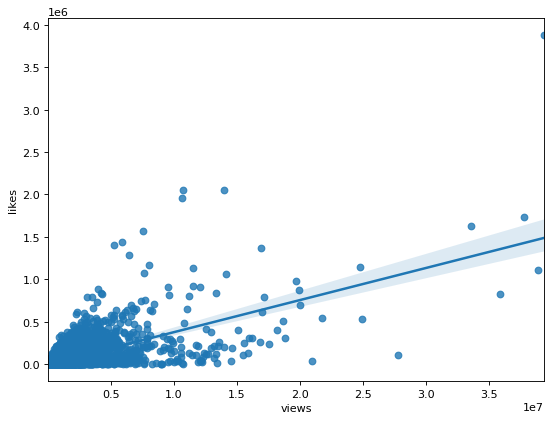

In [13]:
figure(figsize=(8, 6), dpi=80)
sns.regplot(x='views',y='likes',data=df_corr)

Unfortunately, due to the large size of the dataset, it is hard to really interpret the data plot. Instead, we will try another approach. We will consider the **ratio** of number of views to number of likes for a video, and see what ratios are commonly observed by the trending videos. This is a simplistic way of trying to understand how much emphasis YouTube places on the amount of likes a video gets, and if they influece whether or not the video goes trending.

To do this, we will simply divide the `views` and `likes` of the video, then cast it into an integer for simplicity. Then we will produce a histogram showing the distribution of the videos accross different view-like ratios.

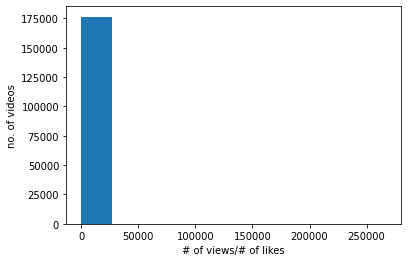

In [14]:
temp = df_corr.copy()
temp = temp[temp['likes']!=0]
temp['view-likes'] = temp['views']/temp['likes']
temp['view-likes'] = temp['view-likes'].astype(int)

plt.xlabel('# of views/# of likes')
plt.ylabel('no. of videos')
plt.hist(temp['view-likes']);

The above plot appears to have many outliers that throw off the scales of the histogram. We can tell however, that most of the data is concentrated in the first half of the first interaval (0, 50000). So we will remove the outliers from the data and take a look again.  

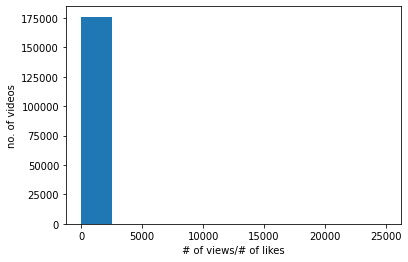

In [15]:
plt.xlabel('# of views/# of likes')
plt.ylabel('no. of videos')
plt.hist(temp[temp['view-likes'] < 25000]['view-likes']);

Even in this interval, we see that a bulk of the data is still concentrated in the first half of the first interval. We will consider a much smaller interval and increase the number of `bins` (default of which is 10) now to see what kind of distribution we have.

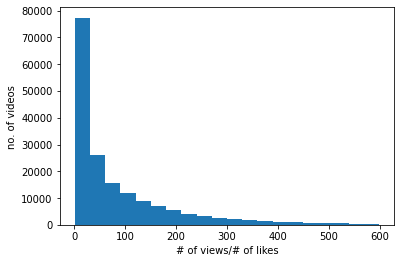

In [16]:
plt.xlabel('# of views/# of likes')
plt.ylabel('no. of videos')
plt.hist(temp[temp['view-likes'] < 600]['view-likes'], bins=20);

This gives us a clearer picture of the data. A large chunk of the videos actually have a fairly small view-like ratio -- approximately less than 60. The number of videos we see rapidly tapers off once the view-like ratio drops less than 100. Lets count these numbers precisely to be sure:

In [17]:
a = len(temp[temp['view-likes'] < 60])
b = len(temp[temp['view-likes'] < 100])
c = len(temp)
print("Views/Likes in (0, 60):\t" + str(a))
print("Views/Likes in [60, 100):\t" + str(b-a))
print("Views/Likes in [100, max):\t" + str(c-b))

Views/Likes in (0, 60):	103040
Views/Likes in [60, 100):	19841
Views/Likes in [100, max):	53566


Though our scatterplots have had long tails, the above numbers confirm that a bulk of the trending videos have smaller view-like ratios: meaning that most trending videos have a large amount of likes relative to their views.
Lets take one last closer look at our critical interval from (0,60):

,views,likes,dislikes,comment_count,view-likes
count,1.764470e+05,1.764470e+05,176447.000000,176447.000000,176447.000000
mean,1.817035e+05,7.005554e+03,399.604493,1000.324494,119.088701
std,5.261973e+05,2.914620e+04,3148.973668,5616.308100,868.352028
min,1.170000e+02,1.000000e+00,0.000000,0.000000,1.000000
25%,1.943700e+04,3.270000e+02,19.000000,52.000000,16.000000
50%,6.206000e+04,1.300000e+03,66.000000,206.000000,40.000000
75%,1.732405e+05,4.774000e+03,216.000000,700.000000,125.000000
max,3.934993e+07,3.880071e+06,629120.000000,733371.000000,266737.000000


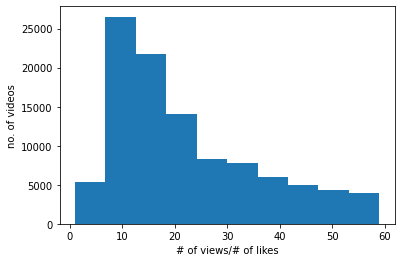

In [18]:
plt.xlabel('# of views/# of likes')
plt.ylabel('no. of videos')
plt.hist(temp[temp['view-likes'] < 60]['view-likes']);
temp.describe()

This provides further confirmation to the prior statement: barring very few outliers, likes are pretty important for a video to be trending. In fact, videos that have a view-like ratio between (10, 25) are especially ubiquitous in the dataset -- a pretty low ratio considering the kind of ratios we were seeing with some outliers! 

#### Views vs Comments

Now let's explore how comments help a video go trending. We start off with a simple scatteplot to once again get a feel for the kind of numbers we are working with. 

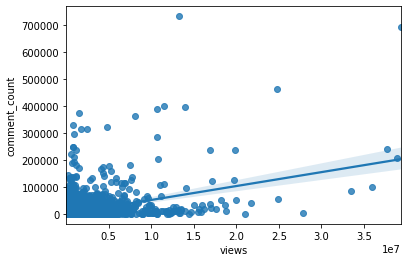

In [19]:
sns.regplot(x='views',y='comment_count',data=df_corr);

Predictably now, there are too many data points to understand much from the scatterplot. Just like with the likes, we will pivot to using the ratio of `views` and `comment_count` in our study, and make a histogram of values.

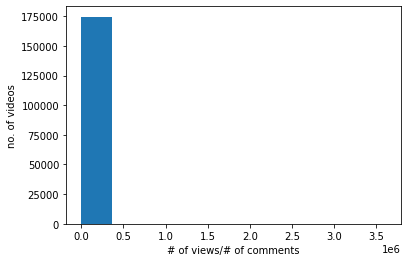

In [20]:
temp = df_corr.copy()
temp = temp[temp['comment_count']!=0]
temp['view-cc'] = temp['views']/temp['comment_count']
temp['view-cc'] = temp['view-cc'].astype(int)

plt.xlabel('# of views/# of comments')
plt.ylabel('no. of videos')
plt.hist(temp['view-cc']);

Our goal again, is to shave off outliers and see where the bulk of the data lies. Lets restrict our histogram to videos with a view-comments ratio less than 3000.

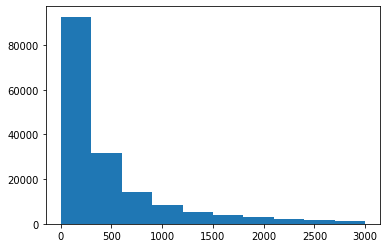

In [21]:
plt.hist(temp[temp['view-cc']<3000]['view-cc']);

We see a concentration in the <500 range, and to study it further, we make another histogram restricted to the (0, 500) range and increase the bins.

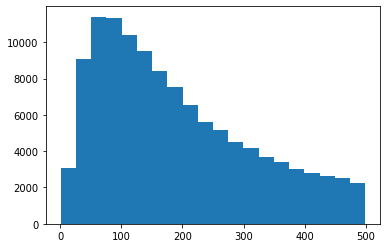

In [22]:
plt.hist(temp[temp['view-cc']<500]['view-cc'], bins=20);

In [23]:
a = len(temp[temp['view-cc']<100]['view-cc'])
b = len(temp[temp['view-cc']<200]['view-cc'])
c = len(temp)
d = b-a
print("Total: " + str(c))
print("# with ratio between:")
print("1) (0,100): " + str(a))
print("2) (100,200): " + str(d))
print("3) (200, max): " + str(c-b))
temp.describe()

Total: 174563
# with ratio between:
1) (0,100): 34448
2) (100,200): 36005
3) (200, max): 104110


,views,likes,dislikes,comment_count,view-cc
count,1.745630e+05,1.745630e+05,174563.000000,174563.000000,1.745630e+05
mean,1.833718e+05,7.079045e+03,403.629034,1011.120971,1.075423e+03
std,5.286462e+05,2.929427e+04,3165.616719,5645.567628,1.061275e+04
min,1.170000e+02,0.000000e+00,0.000000,1.000000,1.000000e+00
25%,2.011000e+04,3.410000e+02,20.000000,55.000000,1.210000e+02
50%,6.315500e+04,1.333000e+03,67.000000,210.000000,2.710000e+02
75%,1.751535e+05,4.854000e+03,219.000000,709.000000,7.140000e+02
max,3.934993e+07,3.880071e+06,629120.000000,733371.000000,3.612445e+06


We see again that a large number of videos have a low view-comment ratio, less than 200. Typically, most videos will have a view-comment ratio of at most 500, observing the histograms. Videos with a ratio of 100 are most expressed compared to others.

In [24]:
print("% of videos with view-comment ratio < 500: " + str(len(temp[temp['view-cc']<500])/len(temp)))

% of videos with view-comment ratio < 500: 0.670302412309596


#### Views vs Dislikes
Here, we do a similar exploration of dislikes and views. From the lessons we learned prior, we will cut directly to the histograms, and inspect the view-dislikes ratio.

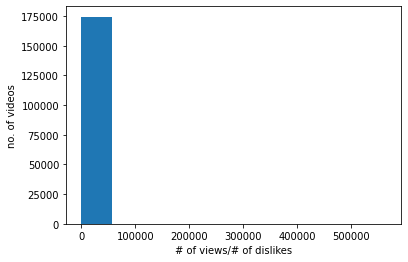

In [25]:
temp = df_corr.copy()
temp = temp[temp['dislikes']!=0]
temp['view-dislikes'] = temp['views']/temp['dislikes']
temp['view-dislikes'] = temp['view-dislikes'].astype(int)

plt.xlabel('# of views/# of dislikes')
plt.ylabel('no. of videos')
plt.hist(temp['view-dislikes']);

Zooming in to our critical interval:

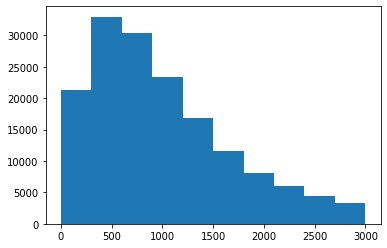

In [26]:
plt.hist(temp[temp['view-dislikes'] < 3000]['view-dislikes']);

In [27]:
a = len(temp[temp['view-dislikes'] < 1000])
b = len(temp[temp['view-dislikes'] < 3000])
c = len(temp)
d = b-a
print("Total: " + str(c))
print("# with ratio between:")
print("1) (0,1000): " + str(a))
print("2) (1000,3000): " + str(d))
print("3) (3000, max): " + str(c-b))
temp.describe()

Total: 174482
# with ratio between:
1) (0,1000): 93162
2) (1000,3000): 65073
3) (3000, max): 16247


,views,likes,dislikes,comment_count,view-dislikes
count,1.744820e+05,1.744820e+05,174482.000000,174482.000000,174482.000000
mean,1.836569e+05,7.082667e+03,404.105375,1011.380435,1432.825329
std,5.287814e+05,2.930050e+04,3166.368615,5646.860742,2873.471062
min,1.170000e+02,0.000000e+00,1.000000,0.000000,1.000000
25%,2.031700e+04,3.410000e+02,20.000000,54.000000,504.000000
50%,6.341750e+04,1.337000e+03,68.000000,210.000000,930.000000
75%,1.755378e+05,4.859000e+03,220.000000,710.000000,1643.000000
max,3.934993e+07,3.880071e+06,629120.000000,733371.000000,564044.000000


We thus see from this analysis that a majority of the videos that appear in the trending page have less than a 1000 view-dislike ratio, and only a few videos on trending have more than a 3000 view-dislike ratio. 

#### Heatmap of views, likes, dislikes, comments 

Finally, lets get a birds-eye view of the relationship between views, likes, dislikes, and comments is through a heatmap. The goal would be to observe the correlation between these variables as a whole for the dataset.

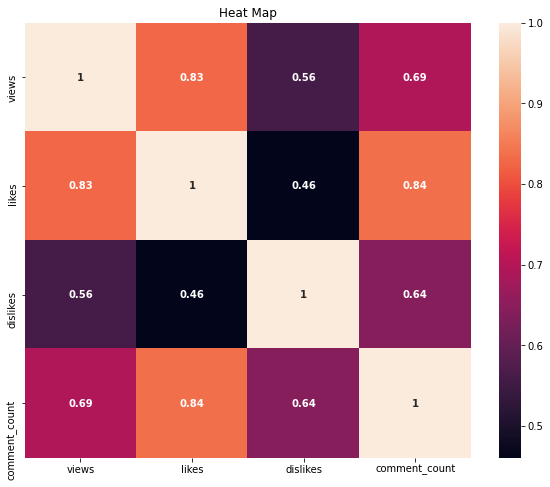

In [28]:
heatmapdf = df_list[0]
heatmapdf = heatmapdf[['views','likes','dislikes','comment_count']]
correlation = heatmapdf.corr()
fig = plt.figure(figsize=(10, 8))
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True, annot_kws={'weight':'bold'})
plt.title('Heat Map')
plt.show()

This heat map shows the relationship between all the combinations of variables.The numbers and colors show the strength of the relatioship - a number closer to 1 and a lighter color would mean the variables are more strongly correlated. 

Some key things to note is that `views` and `likes` have a strong relationship at 0.83 meaning that a video with more views generally also has more likes. Same goes for `likes` and `comment_count`.

### Category Analysis

Our next focus will be on the categories of videos. If you want to start a YouTube channel, you'll need to decide what kind of videos you will be uploading - would they be educational? music? comedy?
Naturally, an important factor in making that decision is how successful each genre is: if nobody wants to watch documentaries on submarines, it is unlikely that your channel will make it big by going over the entire wikipedia page of the [K-129](https://en.wikipedia.org/wiki/Soviet_submarine_K-129_(1960)). 

So what categories are popular in different countries? That is what we will explore in this section.

We will use simply barplots to display the number of videos in each category for country. To do so, we simply query the master dataframe to get all the records of a region, and then drop duplicate occurences (videos occur more than once if they persisted for more than one date on the trending page). The dictionary `region_map` will help us make the titles of our bar plots more informative for the reader. 

Before we begin, let us describe all the possible categories:
- Film & Animation: includes full movies, movie trailers, songs, movie scenes, movie making behind the scenes video and other film related video. ALso  animation short videos, story videos and other animation related videos.
- Autos & Vehicles: includes video related to cars, bikes automobiles technology, customized vehicles and much more.
- Music:  videos related to all kind of music, songs and related content. 
- Pets & Animals: videos like pet or animal training, tips, related products, breed info, funny moves/reactions and more
- Sports: videos for sports, sport equipment, accessories, tips, amazing moments, statistics, guide or coaching and sports related activities
- Travel & Events:  traveling tips, travel places, holiday places list, event videos, event organization and related.
- Gaming: videos for games info, game hacks, tips, game reviews, live playing and more related things. 
- People & Blogs:  people, life style, celebrity talks, things about people, popular blog or sites information, website promotion, reviews and more.
- Comedy: stand up speech, short story, animation story, any funny videos for comedy.
- Entertainment: Most broad category that may also include several other categories in it. Typically includes a range of "entertaining" video topics.
- News & Politics:  includes short news, news type information, and politics related things.
- Howto & Style: 'How to' guides, and fashion related content.
- Education: includes tutorials, knowledge guides, learning, academic classes, and informative topic videos. 
- Science & Technology: content related to science and technology. Typically innovations, facts, etc.
- Nonprofits & Activism: Videos of campaigns, policies, or actions that seek political or social change.

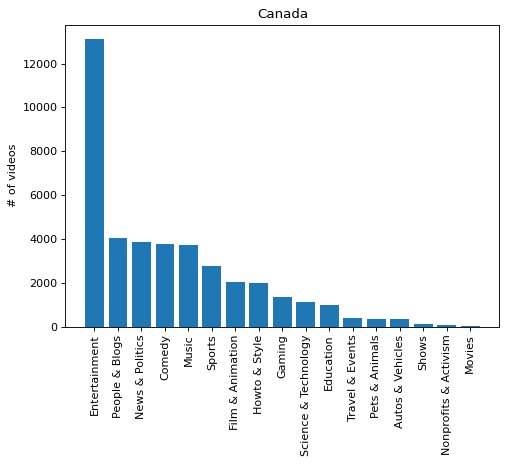

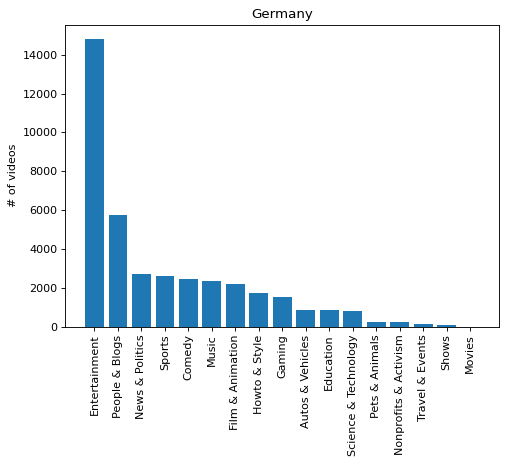

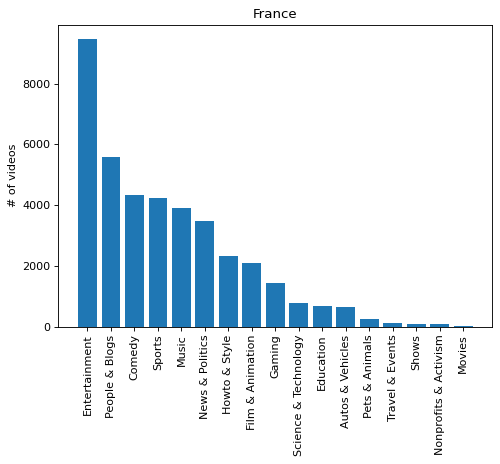

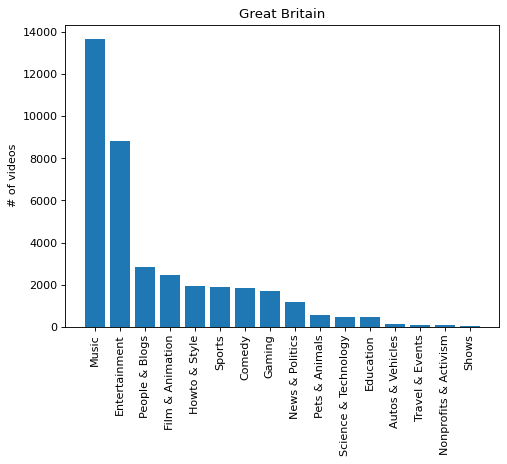

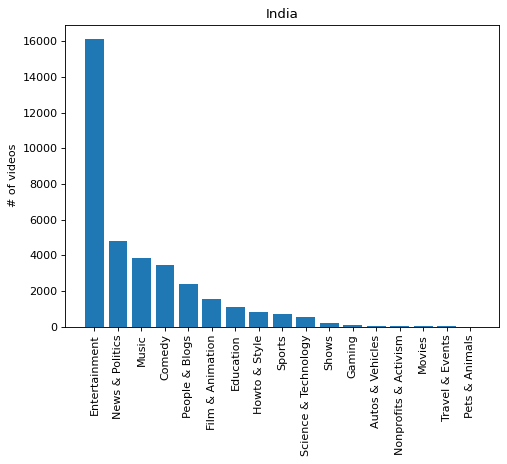

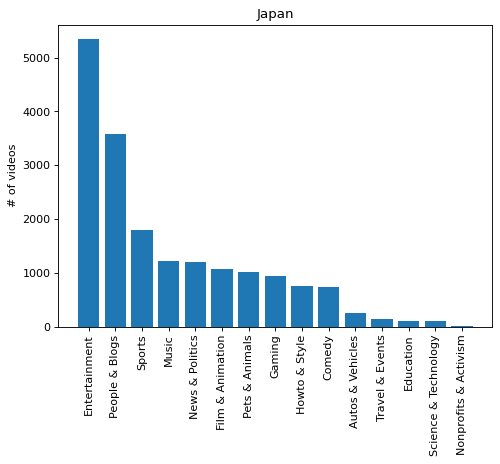

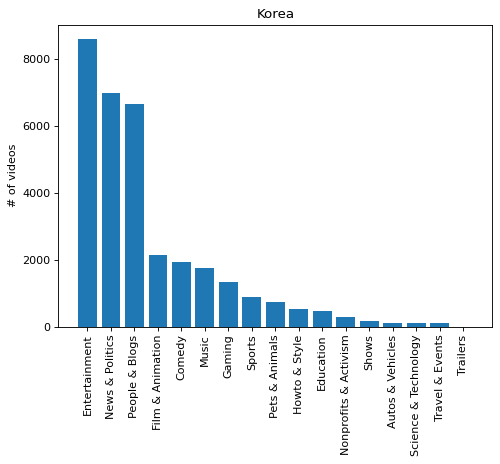

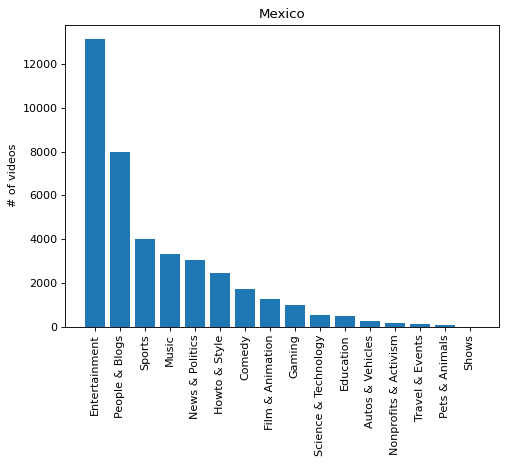

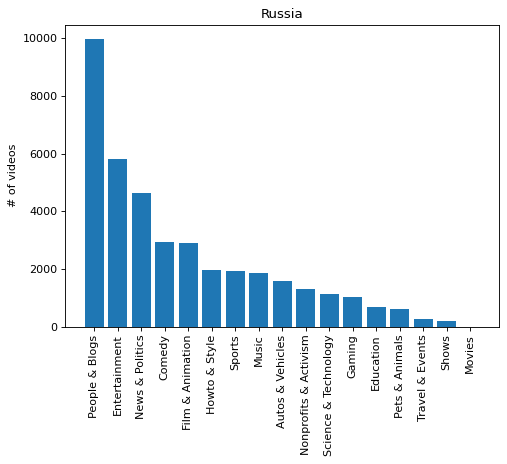

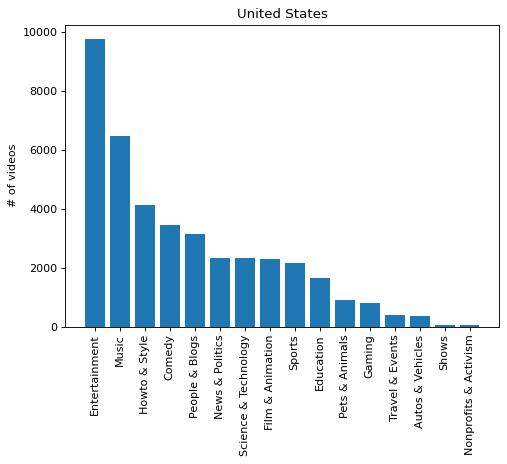

In [29]:
region_map = {
    'CA': 'Canada',
    'DE': 'Germany',
    'US': 'United States',
    'GB': 'Great Britain',
    'FR': 'France',
    'RU': 'Russia',
    'MX': 'Mexico',
    'KR': 'Korea',
    'JP': 'Japan',
    'IN': 'India'
}


for r in regions:
    temp = df[df['region']==r]
    temp.drop_duplicates(subset=['video_id'])
    data = dict(temp['category'].value_counts())
    
    figure(figsize=(7, 5), dpi=80)
    plt.title(region_map[r])
    plt.ylabel("# of videos")
    plt.bar(data.keys(), data.values())
    plt.xticks(rotation=90)

As we can see, different countries seem to like different categories. Broadly, we see that the 'Entertainment' category stands out the most: it is the most watched category for 8 out of the 10 countries. The exceptions are Russia and Great Britain, that prefer 'People & Blogs' and 'Music', respectively. 
Here are some more interesting facts:
- The 'Movies', 'Shows', and 'Nonprofits & Activism' categories seem to have the lowest representations in the trending video lists. 
- Korea seems to consume 'News & Politics' videos proportionately more than the rest of the countries. 
- The 'People & Blogs' category ranks high in all countries (top 3, more commonly 2nd), but is only the 5th rank in the United States trending videos representation.

### Time Taken to Reach Trending
In this section, we are now curious to see, how long does it take for a video to reach the trending page after being published? We will discover this question by analysing the difference between the `publish_time` and the smallest `trending_date` for each video (as this effectively represents the first time the video showed up on the trending page). Recall that we have done this computation and stored it in the `time_diff` column in our data processing section.

For doing our analysis, we will first use the `time_diff` column, which is a `timedelta` object (read more about that [here](https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html), to create a new column `time_diff_hour` which is an integer that approximates the number of hours in that `time_diff`. 

In [30]:
df_time = df[['video_id','time_diff', 'category']].copy()
df_time = df_time.groupby(['video_id']).min()

df_time['time_diff_hours'] = (df_time['time_diff']/pd.Timedelta('1 hour')).astype(int)
df_time

,time_diff,category,time_diff_hours
video_id,,,
#NAME?,0 days 08:50:55,Autos & Vehicles,8
#VALUE!,1 days 16:56:33,Education,40
--1skHapGUc,1 days 04:55:17,Entertainment,28
--2K8l6BWfw,1 days 10:22:26,Pets & Animals,34
--45ws7CEN0,0 days 20:48:42,Gaming,20
...,...,...,...
zzuI1sona1M,1 days 13:59:56,People & Blogs,37
zzvWC_pDiIk,1 days 19:09:43,People & Blogs,43
zzxLG6R5cHI,1 days 04:51:12,Science & Technology,28


Lets now create a boxplot to see what our `time_diff_hours` values look like. This can be done easily using `matplotlib`.

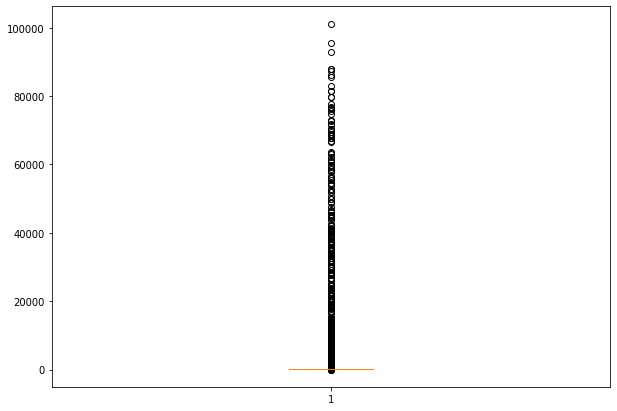

In [31]:
plt.figure(figsize =(10, 7))
plt.boxplot(df_time['time_diff_hours']);

Just like in our various analysis before, we have too many data values, as evidenced by this box plot. Lets try to remove the outliers so we can make sense of this data. To do this, we kept reducing the max `time_diff_hours` until eventually we could see the box.

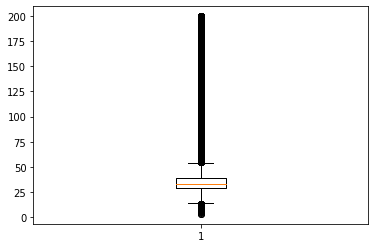

In [32]:
plt.boxplot(df_time[df_time['time_diff_hours'] <= 200]['time_diff_hours']);

Afer that, we will create a histogram to see the distribution of our data, after we zoom into the critical part.

,time_diff,time_diff_hours
count,174704,174704.000000
mean,1 days 12:59:56.756885932,36.423224
std,0 days 16:25:49.854058388,16.434922
min,0 days 03:08:20,3.000000
25%,1 days 05:06:50.250000,29.000000
50%,1 days 09:32:45,33.000000
75%,1 days 15:48:13.250000,39.000000
max,8 days 08:59:59,200.000000


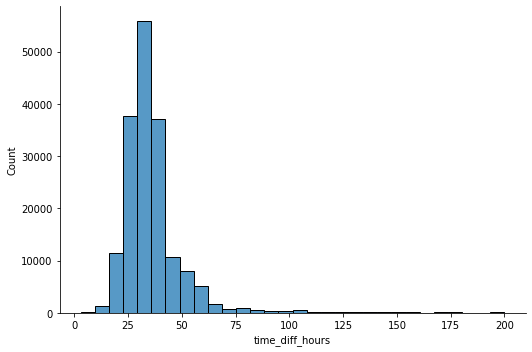

In [33]:
df_time = df_time[df_time['time_diff_hours'] <= 200]
sns.displot(data=df_time, x='time_diff_hours', kind='hist', aspect=1.5, bins=30);
df_time.describe()

We see here that most videos that went trending took a little more than a day to do so. In fact, most of the videos that went trending did so within 2 days of their publicaiton (between 25 and 50 hours). On average, a video took 36 hours to reach trending.

Lets also look at the time to reach trending for each country. Here we will be converting a numerical variable into a categorical variable, this can be useful if the numerical variable varies greatly or has many outliers. In the case of youtube videos, there are some very old videos that become trending and this makes the graphs hard to read. And so lets convert time to trend into the variable within a week, within a month, within a year, and over a year.

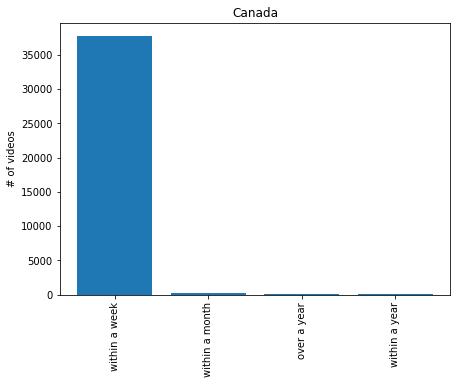

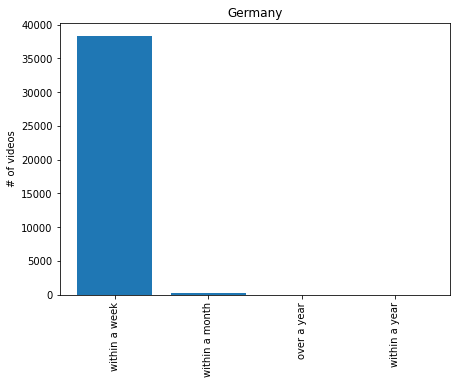

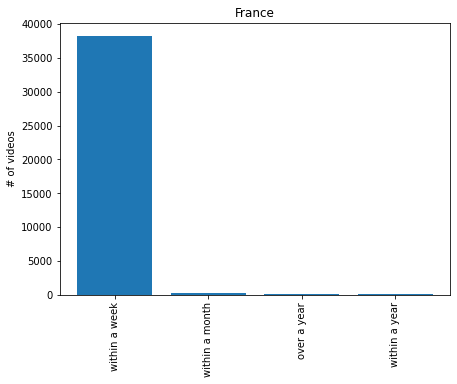

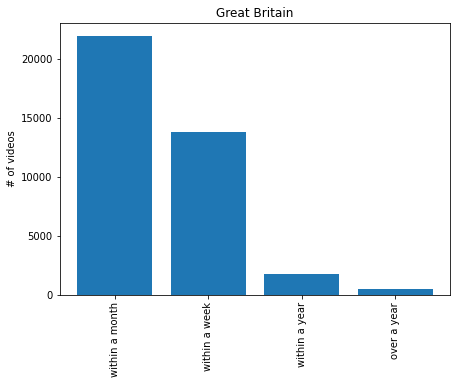

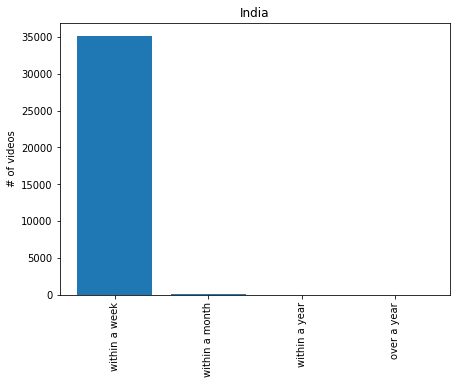

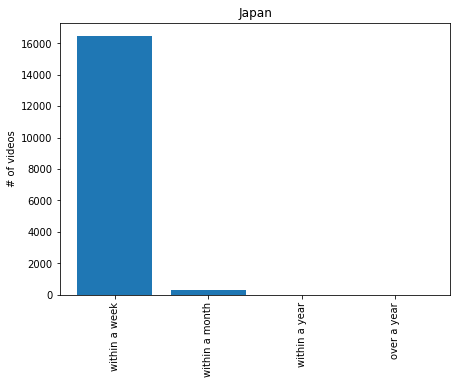

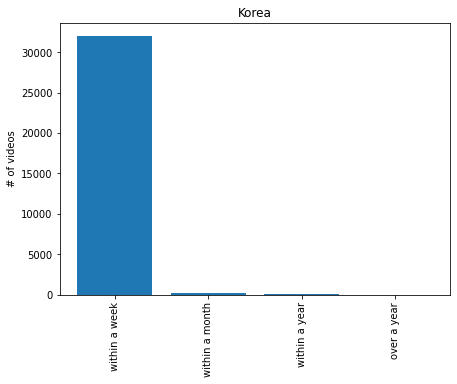

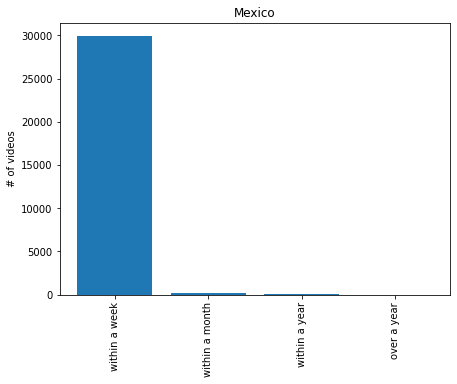

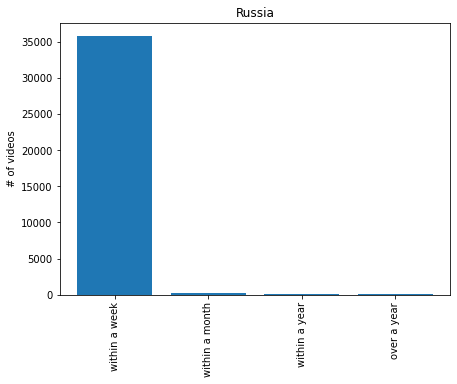

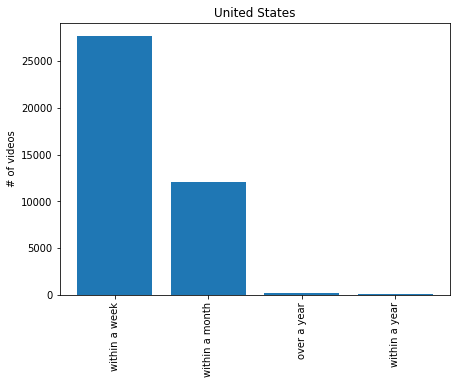

In [34]:
region_map = {
    'CA': 'Canada',
    'DE': 'Germany',
    'US': 'United States',
    'GB': 'Great Britain',
    'FR': 'France',
    'RU': 'Russia',
    'MX': 'Mexico',
    'KR': 'Korea',
    'JP': 'Japan',
    'IN': 'India'
}

df['time_diff_days'] = (df['time_diff'].dt.days)
temp =df.assign(general_time=pd.cut(df['time_diff_days'],bins=[0, 7, 31, 365,999999], labels=['within a week', 'within a month', 'within a year','over a year']))

for r in regions:
    temp1 = temp[temp['region']==r]
    temp1.drop_duplicates(subset=['video_id'])
    data = dict(temp1['general_time'].value_counts())
    
    figure(figsize=(7, 5))
    plt.title(region_map[r])
    plt.ylabel("# of videos")
    plt.bar(data.keys(), data.values())
    plt.xticks(rotation=90)
    plt.autoscale(enable=True, axis="y", tight=False)
    plt.show()

A common trend for all countries is that videos that are trending are most likely to have been uploaded within a week prior. 2 interesting countries are Great Britain and the US because they have a substantial ammount of videos(around 10,000) that took between a week and a month to begin trending, while most other countries have almost none. There are some videos that took several months or even a year to go trending, but these are very few in number. 

### Rate of getting views

Finally, lets see how *fast* your videos need to get views to become trending. We have seen from our prior analysis that a lot of videos that ended up on trending reached their within a week. So our intuition is that videos typically need to have a high rate of attracting viewers to get noticed by YouTube's algorithm. Lets see if we can see some numbers on this.

We will get the number of hours (approximated to an integer) between video publication and trending times, and divide it by the views to approximate how many views the video gets per hour. Then, we will create a histogram to see the distribution of these rates for YouTube's trending videos. 

However, note here that this number may not be exactly accurate - a video may get views faster a few hours after publication then when it first came out. But it stil serves as a rough estimate of how fast we can expect a video to get likes to make it to trending. 

In [35]:
df_rate = df[['time_diff', 'views']].copy()
df_rate['time_diff_hours'] = (df_rate['time_diff']/pd.Timedelta('1 hour')).astype(int)
df_rate['view_rate'] = df_rate['views']/df_rate['time_diff_hours']
df_rate['view_rate'] = df_rate['view_rate'].astype(int)
df_rate.head(5)

,time_diff,views,time_diff_hours,view_rate
0,4 days 06:59:57,17158579,102,168221
1,1 days 07:00:00,1014651,31,32730
2,2 days 04:54:36,3191434,52,61373
3,2 days 05:58:19,2095828,53,39543
4,5 days 12:55:46,33523622,132,253966


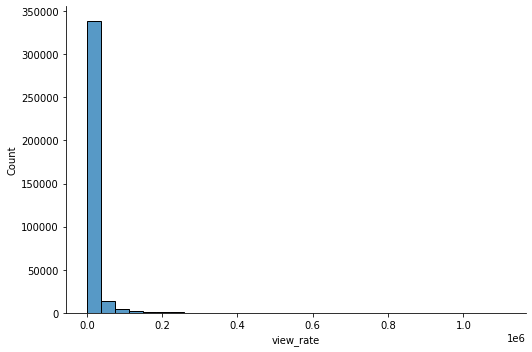

In [36]:
sns.displot(data=df_rate, x='view_rate', kind='hist', aspect=1.5, bins=30);

Once again, outliers skew our histogram and impede our analysis. Lets filter these out so we can get a clear view of our critical intervals. 

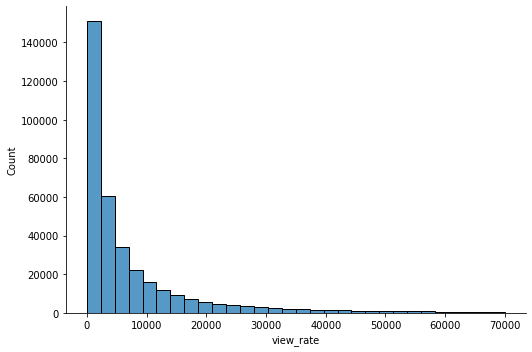

In [37]:
sns.displot(data=df_rate[df_rate['view_rate']<70000], x='view_rate', kind='hist', aspect=1.5, bins=30);

A little suprisingly from this graph, a large majority of the videos accumulated about 4000 views per hour - much smaller than the numbers we were seeing in our brief preview of our `df_rate` dataframe. On average, each video got 11857 views per hour.  

In [38]:
print("% of videos with view_rate < 10000: " + str(len(df_rate[df_rate['view_rate']<10000])/len(df_rate)))
df_rate.describe()

% of videos with view_rate < 10000: 0.7526560580758243


,time_diff,views,time_diff_hours,view_rate
count,362285,3.622850e+05,362285.000000,3.622850e+05
mean,8 days 02:08:37.816575348,1.348514e+06,193.552394,1.185700e+04
std,98 days 23:04:33.946079975,7.187701e+06,2375.079239,3.423893e+04
min,0 days 03:08:20,1.170000e+02,3.000000,0.000000e+00
25%,1 days 08:37:05,4.859400e+04,32.000000,1.050000e+03
50%,1 days 22:08:36,1.823330e+05,46.000000,3.306000e+03
75%,3 days 09:59:53,6.608490e+05,81.000000,9.866000e+03
max,4215 days 15:35:49,4.245389e+08,101175.000000,1.109890e+06


## Model Creation

### Predicting Responses

Since we have a lot of data, we can try to use it to develop some prediction algorithms. We hypothesize that certain videos would generally get more dislikes such as politics, or some videos such as comedy would be more controversial and might have more comments. Additionally, countries have different populations and cultures, and would be into different things. We are going to test some of these assumptions by creating some models.

To create our models, we will be using [scikit-learn](https://scikit-learn.org/stable/index.html), a machine library in python that makes model creation easy with its various built in functionalities. The library is referred to in code as `sklearn`, and will be key to this seciton. 

First, we want to test if a  relationship exists between the category of the video and its statistics (like views, comments, etc). This ties to our first hypothesis, that certain kinds of videos will be more susceptible to stronger audience responses - and a stronger audience response might tie to the video being noticed. The model here would then try to predict the category of the video using its statistics. 

Then, we want to see if the region of the video influences any of the statistics. Would viewers in the US be more likely to dislike a video than viewers in Britain? Largely, we are interested to see if there's a pattern in how people from different countries interact with these videos. So we will try to predict the region of the video using this data. 

Before we dive in, lets define a few terms pertaining to model hypothesis testing:
- NULL hypothesis: There is no statistically significant relationship between the category/region of the video and the other statistics.
- Alternative hypothesis: There is statistically significant relationship between the category/region of the video and the other statistics.

Our goal is to test our created models to see whether or not we **reject** the NULL hypothesis. Rejecting the NULL hypothesis would mean that a relationship does exist between the input and output data. 

We will explore creating these models with few different algorithms and compare results.

#### Decision Tree

First is the the [Decision Tree Algorithm](https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/), which works kind of like a flowchart. After inputting data, the algorithm attempts to create a flow chart to lead the input data to create an output.

For a better understanding, here's an example of a decision tree to determine if an animal is a mammal or not. As you can see, at each point of the tree, we ask questions on the input data that would bring us closer and closer to determining if it is a mammal or not.

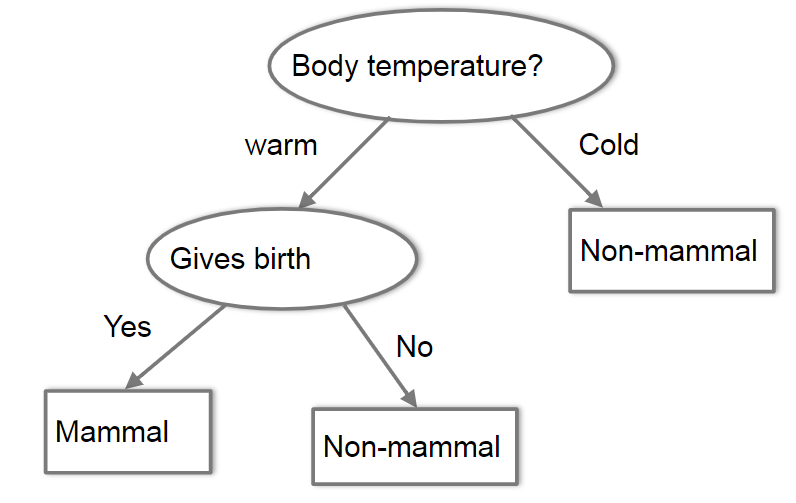

In [39]:
from IPython.display import Image
Image("flowchart.png")

Here's a brief summary of some important terminology for these trees:
- Root node: Nodes with no incoming edges, the first question you ask. In the diagram, this would be the 'Body temperature?' node.
- Internal nodes: Nodes with 1 incoming edge and 2 or more outgoing edge. In the diagram, this would be the 'Gives birth' node.
- Leaf: Nodes with 1 incoming edge and no outgoing edges. Leafs get class labels and are 'Mammal' and 'Non-mammal' nodes in the diagram.

Lets start with importing the neccessary functions.

In [40]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import time

First we must choose our features and labels. Features are the data that is inputted and label is the final decision. In this case we want to see if given views, likes, dislikes, comments and time difference between upload and trending dates, whether or not we can accurately predict what the category of the video was.
*Note that time_diff was originally type timedelta and so needed to be converted to an int*

By choosing features and labels, we are deciding what are our nodes and leafs in the flow chart. Our features are the nodes -- we might be asking something like 'are views over 10000?'. Our labels are our leafs -- they are the conclusions we reach by following the flowchart, which in our case are the categories.


In [41]:
df['time_diff_hours'] = (df['time_diff']/pd.Timedelta('1 hour')).astype(int)
feature_cols = [
    'views',
    'likes',
    'dislikes',
    'comment_count',
    'time_diff_days',
]
X = df[feature_cols] # Features
y = df['category']

In order to test our model, we need to save some data for later to test. In this case we are saving 30% of the data for testing. Additionally, lets also time the code to see how long it takes.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [43]:
clf = DecisionTreeClassifier()
start = time.time()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
end = time.time()
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("took:", end - start, "seconds")

Accuracy: 0.44450067165964335
took: 1.9046859741210938 seconds


As we can see from this model, we have an accuracy of around 44%. This seems to indicate that there isn't a particularly strong relationship observed between these variables.

Lets now try to predict the region of the data to see if there's a relationship there. We will again split our data into a 70% training and a 30% testing set.

In [45]:
df['time_diff_hours'] = (df['time_diff']/pd.Timedelta('1 hour')).astype(int)
feature_cols = [
    'views',
    'likes',
    'dislikes',
    'comment_count',
    'time_diff_days',
]
X = df[feature_cols] # Features
y = df['region']
clf = DecisionTreeClassifier()
start = time.time()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
end = time.time()
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("took:", end - start, "seconds")

Accuracy: 0.4433597703476069
took: 1.8965351581573486 seconds


From this we can see that our decision tree model had an accuracy of .44 or 44% of the time for all 3 of the decision trees. But this only took around 2.4 seconds which is extremely fast. And so we can already draw some conclusions about the advantages and disadvantages about using decision trees. The main advantages are that its easy to understand, easy to use, and fast, but the disadvantages are that its not very good for large datasets and are easily affected by noise in the data.

Lets see now how some other models compare.

#### Random Forest

[Random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) is a method that resamples the training data, builds many decision trees, and averages predictions of trees to classify. This is done using bagging and random feature selection.

To understand bagging, first we will explain bootstrapping.
Bootstrapping is to generate B random datasets by sampling with replacement from dataset,
costructing estimates from each dataset,and compute center(mean) and spread(variance) of estimates.  You can read more about this [here](https://towardsdatascience.com/bootstrapping-statistics-what-it-is-and-why-its-used-e2fa29577307).

Bagging is basically bootstrap aggregation. After creating B bootstrap samples and building B decision trees, you return the average/majority vote for each classification. This attempts to remove biases that may exist in a single bootstrap sample, by averaging it over a bunch of samples.

In theory, this should be more accurate than just a single decision tree. Lets check it out.

First, lets import the libraries.

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

Then, we build the model for predicitng categories, again using the 70-30 training-test split.

In [47]:
df['time_diff_hours'] = (df['time_diff']/pd.Timedelta('1 hour')).astype(int)
feature_cols = [
    'views',
    'likes',
    'dislikes',
    'comment_count',
    'time_diff_days'
]
X = df[feature_cols] # Features
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


clf=RandomForestClassifier(n_estimators=100)
start = time.time()


clf.fit(X_train,y_train)
end = time.time()
y_pred=clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("took:", end - start,"seconds")

Accuracy: 0.5312367738255157
took: 54.18118071556091 seconds


Then, we will try to build a model for predicing regions.

In [48]:
feature_cols = [
    'views',
    'likes',
    'dislikes',
    'comment_count',
    'time_diff_days'
]
X = df[feature_cols] # Features
y = df['region']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


clf=RandomForestClassifier(n_estimators=100)
start = time.time()


clf.fit(X_train,y_train)
end = time.time()
y_pred=clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("took:", end - start,"seconds")

Accuracy: 0.42169184623594574
took: 47.70469951629639 seconds


The accuracy for predicting category was 0.53 but for predicting region it was 0.42 and so it was only a bit better than a decision tree. But as you can see this model took much longer -- there is a tradeoff between accuracy and time. Increasing the computing power is the only way to decrease the time without decreasing accuracy which is why its so important in datascience. 

Seeing the low accuracies of our models, we can make a reasonable conclusion that the video statistics are not sufficient to meaningfully distinguish between categories and regions of videos. And such we are unable to reject the NULL hypothesis at the beginning and conclude that there is no statistically significant relationship between the category/region of the video and the variables `views`, `likes`, `dislikes`, `comment_count`,`time_diff_days`. Though there may exist differences in the way countries interact with content, it is not immediately observable through the various interaction statistics of the videos. 

## Conclusions

In this tutorial, we set out to gain insight on the nature of trending videos on YouTube, to give us a clue on what kind of videos garner the most views, and what kind of statistics are needed for a video to go trending there. 

From the exploratory data analysis, we found that majority of the trending videos had a low ratio of views/likes - 58% had a ratio of 60 or lower, while only 11% had a ratio greater than 100. The mean of views/likes was 119 - but clearly this was skewed by outliers. This means that trending videos get a high number of likes on average with their views. Next, a majority of the videos (67%) had a ratio of views/comments less than 500, with a chunk of them having around a ratio of around a 100. The mean of this ratio was 1075, but again was influenced by outliers. These videos also had a low view-dislike ratio as well. 90% of the videos had the ratio lower than 3000, with a mean ratio of 1432. Overall, it seems like getting likes relative to views is more emphasized by YouTube's algorithm compared to comments and dislikes, as the number of videos with a view-like ratio trails off dramatically after a ceratin point (100), much more strongly than the other other ratios.  

There was a decent amount of correlation between likes and views (0.83) and between likes and comment_count (0.84), though it is not high enough to reject the null hypothesis of no correlation between them. 

When studying the differences in videos across regions, we found that majority of the regions (8/10) had entertainment videos most prevelantly their trending sections. The exceptions are Russia and Great Britain, that prefer 'People & Blogs' and 'Music', respectively. The 'Movies', 'Shows', and 'Nonprofits & Activism' categories seem to have the lowest representations in the trending video lists. Finally, 'News&Politics' is more popular in Korea relative to other countries. This means that it is most likely for a video under 'Entertainment' to be trending than other categories, though note that this category is relatively broad.  

Finally, most of the videos that went trending did so within 2 days of their publication with a mean of 36 hours. On average, a video got around 11857 views per hour. In fact, 75% of them got less than 10000 views per hour - which indicates that the mean was largely skewed by outliers. Interestingly, we observe that the average number of views for a video that first reached trending is 1.34 million -- which is much further than the number of views we get by multiplying the mean hours till publication and mean views per hour, which would be 11857 * 36 = 426852. This indicates that even more than the absolute number of views, the *rate* of getting views is more influential to the YouTube algorithm, as a large chunk of the videos on the trending list have far fewer views than what the mean would suggest.


With all this information on our hands, we then began to create a model to see if we could accurately classify videos based on its statistics. We hypothesized that the statistics of the video (`views`, `likes`, `dislikes`, `comment_count`, and `time_diff_days`), have a relationship with the categories of a video, and the region. The intuition behind this hyopthesis(s) is that videos of some categories could have different user reactions (more controvorsial, etc), and people from different regions will have different reaction patterns (some countries more likely to 'like' a video, etc.).  
We used 2 different models, a decision tree and then a random forest. We found that the the random forest was more accurate than the decision tree but was still only had an accuracy in the .5's. We also timed the 2 models to show that random forests take a significantly longer time to train.Based on our models we decided that we were unable to reject the NULL hypothesis we made and therefore there is no statistically significant relationship between the category/region of the video and the variables `views`, `likes`, `dislikes`, `comment_count`, and `time_diff_days`.

Getting your video trending on YouTube is not easy. There are many more variables that go into it than the ones we described here - especially unmeasurable ones like topic, video quality, etc. But we hope from this tutorial that you have atleast a brief idea of the metrics to target to get noticed by YouTube's algorithms. Particularly, an emphasis should be placed on rate of getting views - which can be done by uploading videos on topics that are particularly trending at the current time. Audience reaction such as likes and comments also boost chances of being noticed. Finally, videos created for entertainment seem more noticed than the rest.

Thank you for reading, we wish you the best of luck to be the next pewdiepie!

## Bibliography

Our study is just the beginning when it comes to understanding YouTube. Here's some more sources if you are interested:
#### Link to our dataset:
- https://www.kaggle.com/datasnaek/youtube-new

#### More about YouTube's trending page and algorithms:
- https://support.google.com/youtube/answer/7239739?hl=en
- https://blog.hootsuite.com/how-the-youtube-algorithm-works/

#### General sources for data science knowledge:
- Pandas cookbook: https://github.com/jvns/pandas-cookbook
- Numpy tutorial: https://numpy.org/doc/stable/user/quickstart.html
- matplotlib tutorial: https://matplotlib.org/stable/tutorials/index
- Seaborn intro: http://seaborn.pydata.org/introduction.html
- Decision trees: https://scikit-learn.org/stable/modules/tree.html
- Random forests: https://towardsdatascience.com/understanding-random-forest-58381e0602d2
